<a href="https://colab.research.google.com/github/Creek-d/Class-Practice---Penguins-Species-Classification/blob/main/Class_work_Supervised_Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Supervise Learning***

### Classification
### Regression

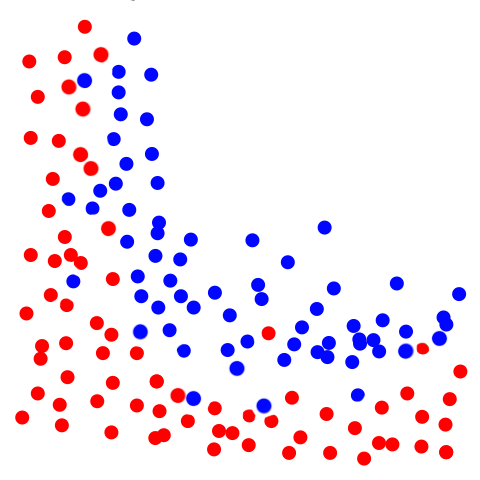

### Over Fitting

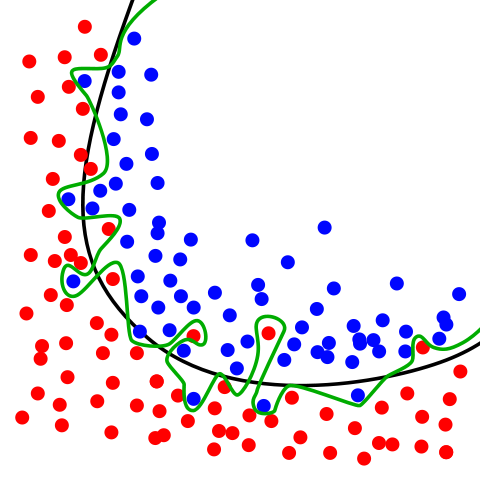

### **Under fitting**

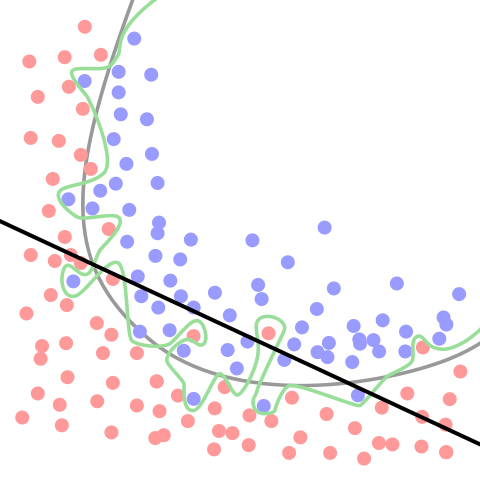

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/penguins_size.csv')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    int64  
 5   body_mass_g        342 non-null    int64  
 6   sex                334 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.8+ KB


In [86]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [96]:
X=df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']]

In [98]:
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}

In [100]:
Y = df['species'].map(species_mapping)

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y,random_state=42)

In [102]:
from sklearn.neighbors import KNeighborsClassifier # First step: creat model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2) # creat model because P= 2 then the method for distance calculation is Euclidiean Method

knn.fit(x_train, y_train) # Second step:Fitting the model

KNeighborsClassifier()

In [103]:
knn.score(x_test, y_test)

0.7766990291262136

In [104]:
knn.score(x_train, y_train)

0.8326359832635983

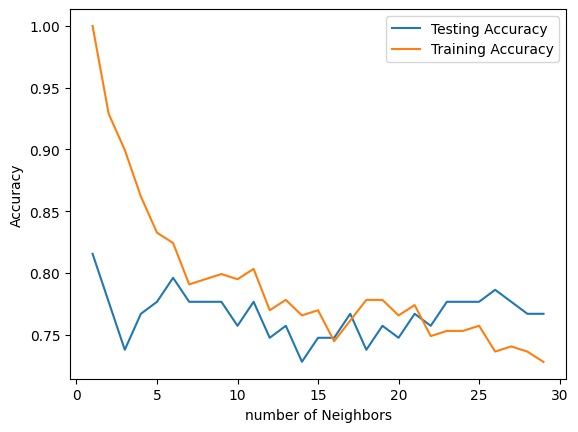

In [52]:
neighbors = np.arange(1, 30)

train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    train_accuracy[i] = knn_model.score(x_train, y_train)
    test_accuracy[i] = knn_model.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#x_new = np.array([12,	5	, 7, 	12, 	176,	9.3,	0.359392,	0.008608])
#knn.predict([x_new])

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6, random_state=42) # Creat Model
dtc.fit(x_train, y_train) # Fit the model

DecisionTreeClassifier(max_depth=6, random_state=42)

**max_depth**: Restrict the maximum depth of the tree to prevent the model from becoming too complex and overfitting.
**min_samples_split**: Set the minimum number of samples required to split an internal node. Increasing this value can result in a less complex model.
**min_samples_leaf**: Specify the minimum number of samples a leaf node must have. Larger numbers prevent the model from fitting excessively to the training data.
**max_features**: Limit the number of features to consider when looking for the best split; using fewer features can reduce overfitting.
**max_leaf_nodes**: Restrict the number of leaf nodes in the tree to simplify the model.


In [62]:
predict_dtc = dtc.predict(x_train) # Prediction

In [55]:
predict_dtc

array([0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 2,
       0, 2, 0, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 2, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 1])

In [56]:
dtc.predict(x_test)

array([0, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1, 1, 0,
       1, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0,
       2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1, 0])

In [57]:
from sklearn import metrics
#metrics.accuracy_score(y_train, predict_dtc)

In [58]:
dtc.score(x_test,y_test)

0.9902912621359223

In [ ]:
#xnew=[1,1,1,1]
#predict2= dtc.predict([xnew])
#predict2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [59]:
# visualisation of decision tree

import graphviz # the library for visaualisation of tree
from sklearn.tree import export_graphviz
export_graphviz(dtc, out_file="tree.dot",filled=True, rounded=True)


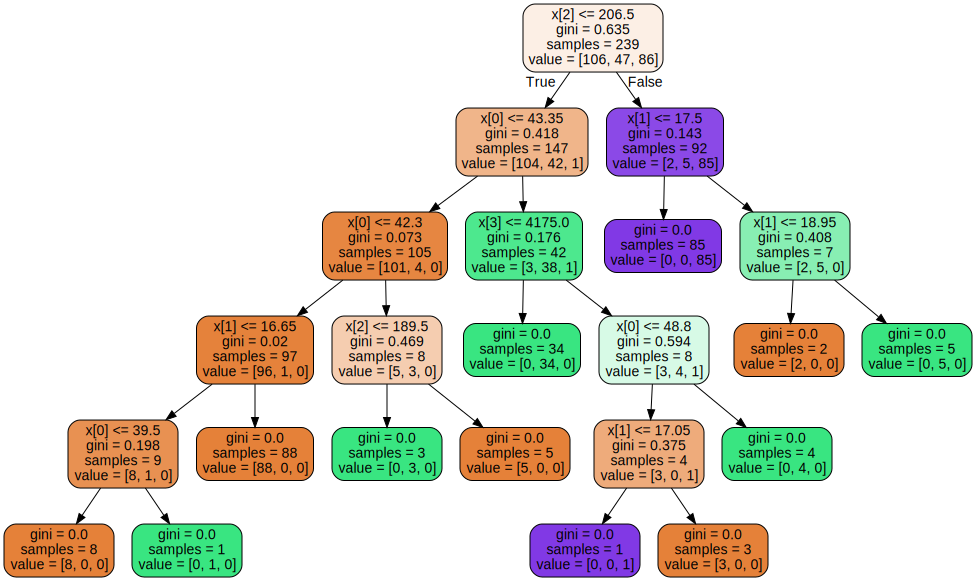

In [80]:
# Load and render the decision tree from the dot file
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

There are different types of nodes in a decision tree:

Root Node:

The top most node of the tree.
Represents the entire dataset, which is then split based on the feature that provides the best split according to the chosen criterion (e.g., Gini impurity, entropy).
Internal Nodes:

Nodes that split into two or more sub-nodes.
Each internal node represents a decision based on one of the input features.
The decision at an internal node determines which subsequent node (or sub-node) a data point moves to.
Leaf Nodes:

The terminal nodes of the tree, also known as terminal or end nodes.
They do not split further.
Each leaf node represents a class label (in classification) or a continuous value (in regression).

|--- feature_2 <= 206.50
|   |--- feature_0 <= 43.35
|   |   |--- feature_0 <= 42.30
|   |   |   |--- feature_1 <= 16.65
|   |   |   |   |--- feature_0 <= 39.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  39.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  16.65
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  42.30
|   |   |   |--- feature_2 <= 189.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  189.50
|   |   |   |   |--- class: 0
|   |--- feature_0 >  43.35
|   |   |--- feature_3 <= 4175.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  4175.00
|   |   |   |--- feature_0 <= 48.80
|   |   |   |   |--- feature_1 <= 17.05
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_1 >  17.05
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  48.80
|   |   |   |   |--- class: 1
|--- feature_2 >  206.50
|   |--- feature_1 <= 17.50
|   |   |--- class: 2
|   |--- feature_1 >  17.50
|   |   |--- feature_1 <

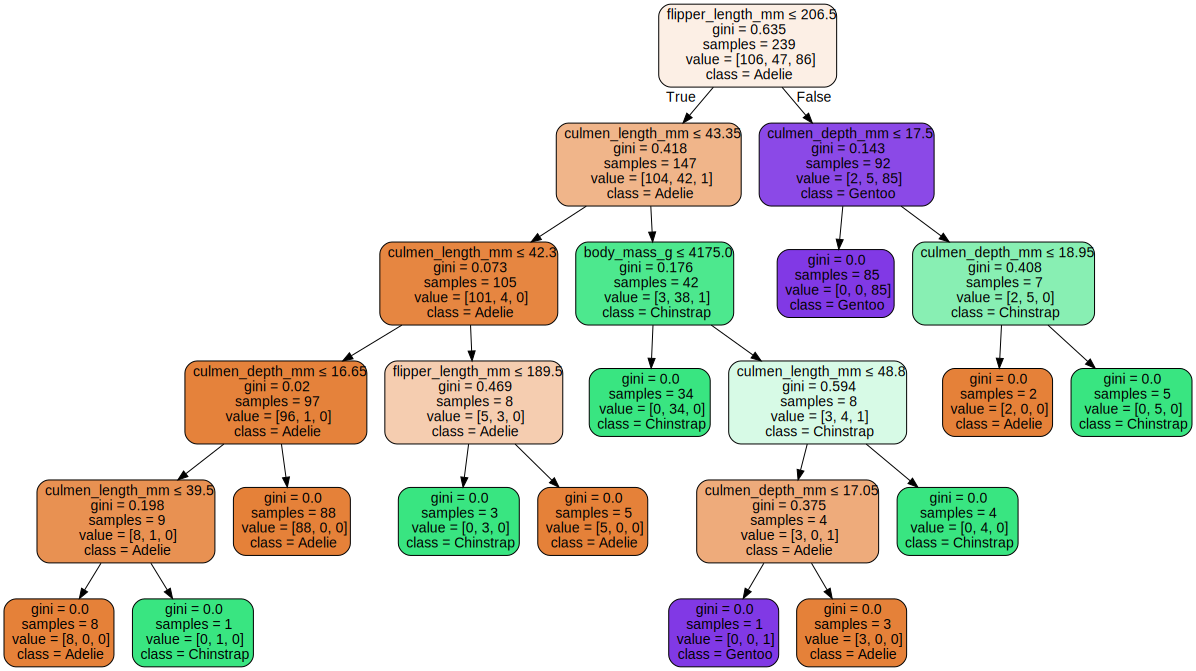

In [92]:
# prompt: please give me code to illustrate the decision tree with its nodes and results and gini indicator

from sklearn import tree

# Assuming you have your decision tree classifier 'dtc' and feature names 'feature_names'
text_representation = tree.export_text(dtc)
print(text_representation)

# You can also visualize the tree using graphviz (as you have done before)
# This provides a more intuitive representation with nodes, edges, and splits.

# For example:
export_graphviz(dtc, out_file="tree_with_gini.dot",
                feature_names=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],  # Replace with your actual feature names
                class_names=['Adelie', 'Chinstrap', 'Gentoo'],  # Replace with your actual class names
                filled=True, rounded=True, special_characters=True)

with open("tree_with_gini.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# The graphviz visualization will show the decision tree structure, including:
# - Internal nodes with the feature used for splitting and the threshold value.
# - Leaf nodes with the predicted class and the number of samples in that leaf.
# - The Gini index for each node, representing the impurity of the data.
